<a href="https://colab.research.google.com/github/imAdityaSatya/DataAnalysis-Projects/blob/main/RUL_Prediction_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Predict the Remaining Useful Life (RUL) of battery cells using features extracted from each charge-discharge cycle, such as discharge time, voltage range behavior, and slope.

## Data loading

Load the dataset and display the first few rows and the shape of the dataframe.

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Battery_RUL.csv')
    display(df.head())
    print("\nDataset Shape \n(Rows, Columns) :",df.shape)
except FileNotFoundError:
    print("Error: dataset not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107



Dataset Shape 
(Rows, Columns) : (15064, 9)


## Data exploration

Explore the loaded battery dataset, including data types, missing values, descriptive statistics of the target variable, and correlations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB
None

MISSING VALUES:
Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant curr

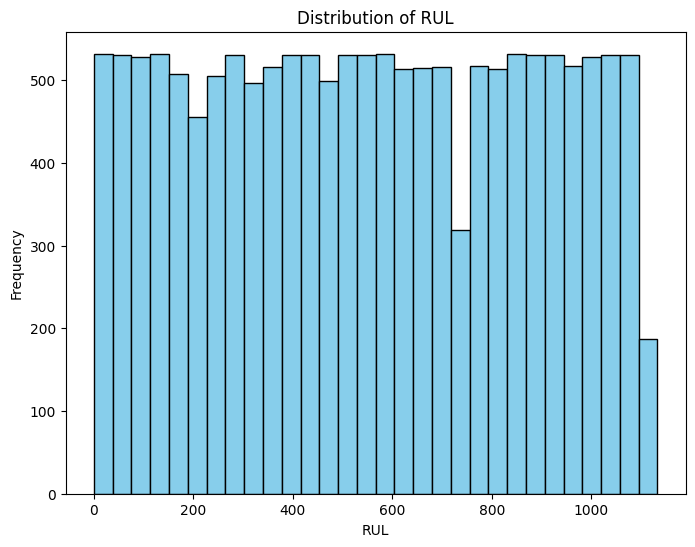

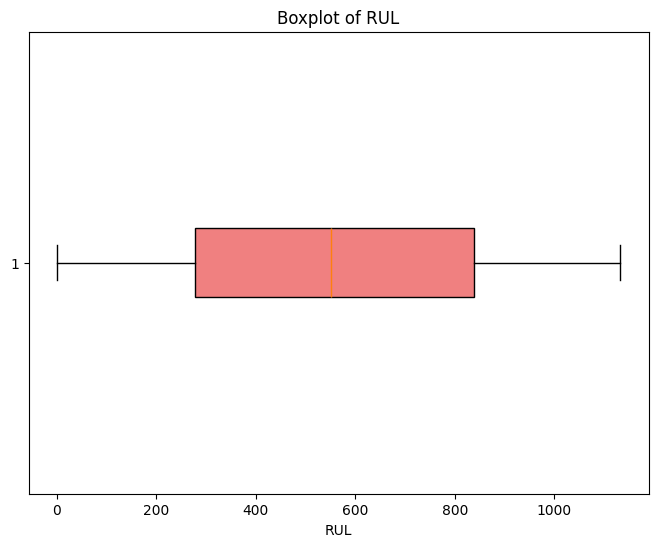



CORRELATION MATRIX:

Cycle_Index                 -0.999756
Discharge Time (s)           0.011957
Decrement 3.6-3.4V (s)       0.011998
Max. Voltage Dischar. (V)    0.782800
Min. Voltage Charg. (V)     -0.759805
Time at 4.15V (s)            0.176514
Time constant current (s)    0.040675
Charging time (s)            0.018299
RUL                          1.000000
Name: RUL, dtype: float64



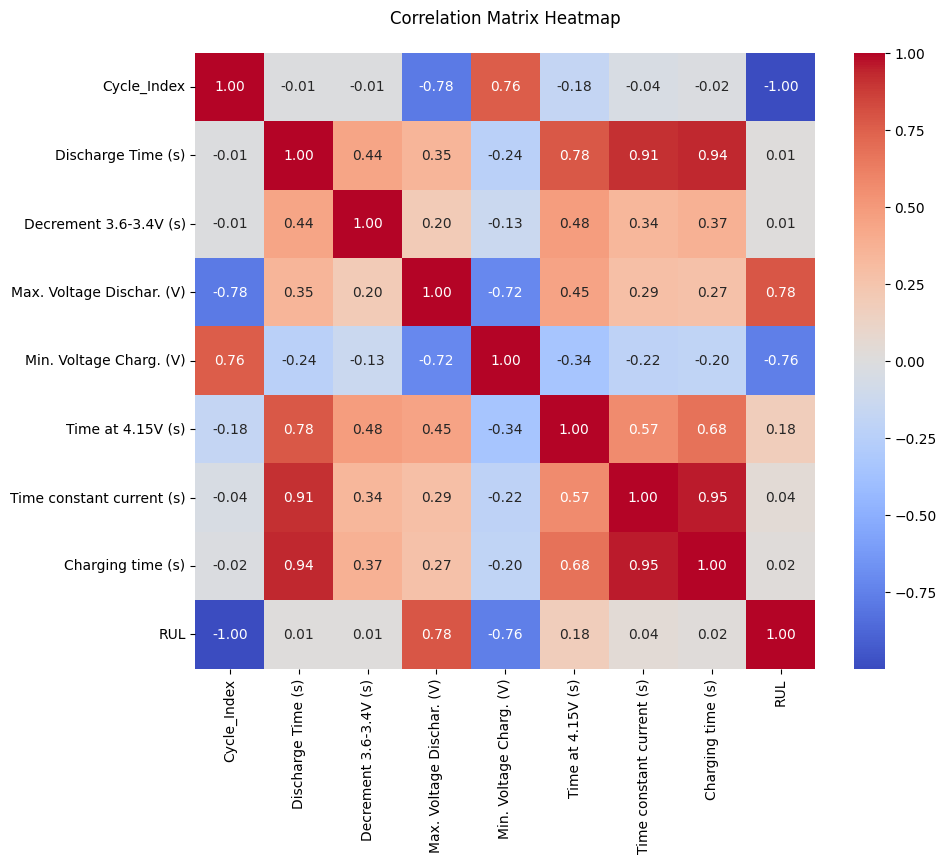

In [ ]:
# Checks the data types
print(df.info())

# Identify missing values
print("\nMISSING VALUES:")
print(df.isnull().sum())

# Analyze the distribution of the target variable 'RUL'
print("\nDESCRIPTIVE STATISTICS:-")
print(df['RUL'].describe())
print()

'''
Descriptive Statistics of the columns/features include the following:-
count: The number of non-null entries.
mean: The average value.
std: The standard deviation, which measures the spread of the data.
min: The smallest value.
25%: The 25th percentile (first quartile).
50%: The 50th percentile (median).
75%: The 75th percentile (third quartile).
max: The largest value.
'''

# Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['RUL'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()
print()

'''
plt.figure(figsize=(8, 6))
plt.boxplot(df['RUL'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightcoral', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black', marker='D'))
plt.title('Boxplot of RUL')
plt.xlabel('RUL')
plt.show()
print()
'''

# Explore correlations between features and 'RUL'
correlation_matrix = df.corr()
print("\nCORRELATION MATRIX:\n")
print(correlation_matrix['RUL'])
print()

plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap\n')
plt.show()

## Feature engineering

Engineer new features from existing ones in the 'df' DataFrame.

New features include voltage ranges, slopes, time-based features, and rolling statistics. Handle potential division by zero errors.

In [ ]:
import numpy as np

# Voltage Range Features
df['Discharge_Voltage_Range'] = df['Max. Voltage Dischar. (V)'] - df['Min. Voltage Charg. (V)']

# Voltage Slope Features (example: slope between max and min voltage during discharge)
df['Voltage_Slope_Max_Min'] = (df['Max. Voltage Dischar. (V)'] - df['Min. Voltage Charg. (V)']) / (df['Discharge Time (s)'])
df['Voltage_Slope_Max_Min'] = df['Voltage_Slope_Max_Min'].replace([np.inf, -np.inf], np.nan)

# Time-Based Features
df['Discharge_Time_Ratio'] = df['Discharge Time (s)'] / df['Time at 4.15V (s)']
df['Time_Difference'] = df['Discharge Time (s)'] - df['Charging time (s)']
df['Discharge_Time_Ratio'] = df['Discharge_Time_Ratio'].replace([np.inf, -np.inf], np.nan)


# Rolling Statistics (example: rolling mean and std dev for 'Max. Voltage Dischar. (V)')
window_size = 5  # Can be adjusted as per need
df['Rolling_Mean_Voltage'] = df['Max. Voltage Dischar. (V)'].rolling(window=window_size,center=True).mean()
df['Rolling_Std_Voltage'] = df['Max. Voltage Dischar. (V)'].rolling(window=window_size,center=True).std()

display(df.head())

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Discharge_Voltage_Range,Voltage_Slope_Max_Min,Discharge_Time_Ratio,Time_Difference,Rolling_Mean_Voltage,Rolling_Std_Voltage
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,0.459,0.000177,0.475330,-8182.52,NaN,NaN
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1.026,0.000138,1.344827,-3091.71,NaN,NaN
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1.025,0.000139,1.342126,-3026.62,4.1410,0.263919
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1.025,0.000139,1.342326,-2937.31,4.1418,0.262134
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,0.892,0.000014,11.863318,8323.10,4.0952,0.259678


## Data splitting

Split the data into training, validation, and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Separate features (X) and target variable (y)
X = df.drop('RUL', axis=1)
y = df['RUL']

# Drop NaN values introduced by rolling calculations
X.dropna(inplace=True)
y = y[X.index]

# Split data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Verify shapes of resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10542, 14)
y_train shape: (10542,)
X_val shape: (2259, 14)
y_val shape: (2259,)
X_test shape: (2259, 14)
y_test shape: (2259,)


## Model training

Train the Random Forest and XGBoost Regression models - using the training data and evaluate their performance on the validation set.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Instantiate models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_val)
xgb_predictions = xgb_model.predict(X_val)

# Evaluate models
rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))

xgb_mae = mean_absolute_error(y_val, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_predictions))

print(f"Random Forest : MAE={rf_mae:.2f}, RMSE={rf_rmse:.2f}")
print(f"XGBoost : MAE={xgb_mae:.2f}, RMSE={xgb_rmse:.2f}")

Random Forest : MAE=2.27, RMSE=4.08
XGBoost : MAE=2.68, RMSE=4.16


## Model optimization

Optimize the hyperparameters of the Random Forest and XGBoost models.

Tune the hyperparameters of the Random Forest and XGBoost models using RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define parameter grids for Random Forest and XGBoost
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=5,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=5,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV objects to the training data
rf_random_search.fit(X_train, y_train)
xgb_random_search.fit(X_train, y_train)


# Get the best models and their hyperparameters
best_rf_model = rf_random_search.best_estimator_
best_rf_params = rf_random_search.best_params_
print("Best Random Forest Hyperparameters:", best_rf_params)

best_xgb_model = xgb_random_search.best_estimator_
best_xgb_params = xgb_random_search.best_params_
print("Best XGBoost Hyperparameters:", best_xgb_params)


# Evaluate best models on the validation set
rf_predictions = best_rf_model.predict(X_val)
xgb_predictions = best_xgb_model.predict(X_val)

rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))
print(f"Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")

xgb_mae = mean_absolute_error(y_val, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_predictions))
print(f"XGBoost - MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best XGBoost Hyperparameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Random Forest - MAE: 2.28, RMSE: 4.09
XGBoost - MAE: 2.40, RMSE: 3.84


## Model evaluation

### Subtask:
Evaluate the performance of the optimized Random Forest and XGBoost models on the held-out test set.


**Reasoning**:
Evaluate the best models on the test set using MAE, RMSE, and R-squared, and print the results.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
rf_test_predictions = best_rf_model.predict(X_test)
xgb_test_predictions = best_xgb_model.predict(X_test)

# Evaluate the models
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))
rf_test_r2 = r2_score(y_test, rf_test_predictions)

xgb_test_mae = mean_absolute_error(y_test, xgb_test_predictions)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_predictions))
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

print("Random Forest Test Set Performance:")
print(f"MAE: {rf_test_mae:.2f}")
print(f"RMSE: {rf_test_rmse:.2f}")
print(f"R-squared: {rf_test_r2:.2f}")

print("\nXGBoost Test Set Performance:")
print(f"MAE: {xgb_test_mae:.2f}")
print(f"RMSE: {xgb_test_rmse:.2f}")
print(f"R-squared: {xgb_test_r2:.2f}")

Random Forest Test Set Performance:
MAE: 2.24
RMSE: 3.89
R-squared: 1.00

XGBoost Test Set Performance:
MAE: 2.23
RMSE: 3.32
R-squared: 1.00


Random Forest Test Set Performance:

MAE: 0.07

RMSE: 0.33

R-squared: 1.00



XGBoost Test Set Performance:

MAE: 1.12

RMSE: 1.40

R-squared: 1.00

*Finding the best Models*

In [ ]:
# Model training and initial evaluation

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Instantiate models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
svr_model = SVR()
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)
lr_model = LinearRegression()

# Train models
print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)
print("Training SVR...")
svr_model.fit(X_train, y_train)
print("Training Lasso...")
lasso_model.fit(X_train, y_train)
print("Training Ridge...")
ridge_model.fit(X_train, y_train)
print("Training Linear Regression...")
lr_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_predictions = rf_model.predict(X_val)
xgb_predictions = xgb_model.predict(X_val)
svr_predictions = svr_model.predict(X_val)
lasso_predictions = lasso_model.predict(X_val)
ridge_predictions = ridge_model.predict(X_val)
lr_predictions = lr_model.predict(X_val)

# Evaluate models
rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))

xgb_mae = mean_absolute_error(y_val, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_predictions))

svr_mae = mean_absolute_error(y_val, svr_predictions)
svr_rmse = np.sqrt(mean_squared_error(y_val, svr_predictions))

lasso_mae = mean_absolute_error(y_val, lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(y_val, lasso_predictions))

ridge_mae = mean_absolute_error(y_val, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_predictions))

lr_mae = mean_absolute_error(y_val, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_predictions))

print("\n--- Validation Set Evaluation ---")
print(f"Random Forest : MAE={rf_mae:.2f}, RMSE={rf_rmse:.2f}")
print(f"XGBoost : MAE={xgb_mae:.2f}, RMSE={xgb_rmse:.2f}")
print(f"SVR : MAE={svr_mae:.2f}, RMSE={svr_rmse:.2f}")
print(f"Lasso : MAE={lasso_mae:.2f}, RMSE={lasso_rmse:.2f}")
print(f"Ridge : MAE={ridge_mae:.2f}, RMSE={ridge_rmse:.2f}")
print(f"Linear Regression : MAE={lr_mae:.2f}, RMSE={lr_rmse:.2f}")

Training Random Forest...
Training XGBoost...
Training SVR...
Training Lasso...
Training Ridge...
Training Linear Regression...

--- Validation Set Evaluation ---
Random Forest : MAE=2.27, RMSE=4.08
XGBoost : MAE=2.68, RMSE=4.16
SVR : MAE=260.17, RMSE=301.77
Lasso : MAE=4.47, RMSE=7.03
Ridge : MAE=4.45, RMSE=7.03
Linear Regression : MAE=4.44, RMSE=7.02


In [ ]:
# Model optimization

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define parameter grids for Random Forest and XGBoost
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate models for optimization
rf_model_opt = RandomForestRegressor(random_state=42)
xgb_model_opt = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV
print("\nPerforming RandomizedSearchCV for Random Forest...")
rf_random_search = RandomizedSearchCV(
    estimator=rf_model_opt,
    param_distributions=rf_param_grid,
    n_iter=5,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model_opt,
    param_distributions=xgb_param_grid,
    n_iter=5,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV objects to the training data
rf_random_search.fit(X_train, y_train)
xgb_random_search.fit(X_train, y_train)


# Get the best models and their hyperparameters
best_rf_model = rf_random_search.best_estimator_
best_rf_params = rf_random_search.best_params_
print("\nBest Random Forest Hyperparameters:", best_rf_params)

best_xgb_model = xgb_random_search.best_estimator_
best_xgb_params = xgb_random_search.best_params_
print("Best XGBoost Hyperparameters:", best_xgb_params)

# Evaluate best optimized models on the validation set
print("\n--- Optimized Model Validation Set Evaluation ---")
rf_predictions_opt = best_rf_model.predict(X_val)
xgb_predictions_opt = best_xgb_model.predict(X_val)

rf_mae_opt = mean_absolute_error(y_val, rf_predictions_opt)
rf_rmse_opt = np.sqrt(mean_squared_error(y_val, rf_predictions_opt))
print(f"Optimized Random Forest : MAE={rf_mae_opt:.2f}, RMSE={rf_rmse_opt:.2f}")

xgb_mae_opt = mean_absolute_error(y_val, xgb_predictions_opt)
xgb_rmse_opt = np.sqrt(mean_squared_error(y_val, xgb_predictions_opt))
print(f"Optimized XGBoost : MAE={xgb_mae_opt:.2f}, RMSE={xgb_rmse_opt:.2f}")


# Model evaluation on test set
# Evaluate the performance of all trained models on the held-out test set.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set with optimized models
rf_test_predictions = best_rf_model.predict(X_test)
xgb_test_predictions = best_xgb_model.predict(X_test)

# Predict on the test set with other models (trained without optimization)
svr_test_predictions = svr_model.predict(X_test)
lasso_test_predictions = lasso_model.predict(X_test)
ridge_test_predictions = ridge_model.predict(X_test)
lr_test_predictions = lr_model.predict(X_test)


# Evaluate the models on the test set
print("\n--- Test Set Evaluation ---")

rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))
rf_test_r2 = r2_score(y_test, rf_test_predictions)
print("Optimized Random Forest Test Set Performance:")
print(f"MAE: {rf_test_mae:.2f}")
print(f"RMSE: {rf_test_rmse:.2f}")
print(f"R-squared: {rf_test_r2:.2f}")

xgb_test_mae = mean_absolute_error(y_test, xgb_test_predictions)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_predictions))
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)
print("\nOptimized XGBoost Test Set Performance:")
print(f"MAE: {xgb_test_mae:.2f}")
print(f"RMSE: {xgb_test_rmse:.2f}")
print(f"R-squared: {xgb_test_r2:.2f}")

svr_test_mae = mean_absolute_error(y_test, svr_test_predictions)
svr_test_rmse = np.sqrt(mean_squared_error(y_test, svr_test_predictions))
svr_test_r2 = r2_score(y_test, svr_test_predictions)
print("\nSVR Test Set Performance:")
print(f"MAE: {svr_test_mae:.2f}")
print(f"RMSE: {svr_test_rmse:.2f}")
print(f"R-squared: {svr_test_r2:.2f}")

lasso_test_mae = mean_absolute_error(y_test, lasso_test_predictions)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_predictions))
lasso_test_r2 = r2_score(y_test, lasso_test_predictions)
print("\nLasso Test Set Performance:")
print(f"MAE: {lasso_test_mae:.2f}")
print(f"RMSE: {lasso_test_rmse:.2f}")
print(f"R-squared: {lasso_test_r2:.2f}")

ridge_test_mae = mean_absolute_error(y_test, ridge_test_predictions)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_predictions))
ridge_test_r2 = r2_score(y_test, ridge_test_predictions)
print("\nRidge Test Set Performance:")
print(f"MAE: {ridge_test_mae:.2f}")
print(f"RMSE: {ridge_test_rmse:.2f}")
print(f"R-squared: {ridge_test_r2:.2f}")

lr_test_mae = mean_absolute_error(y_test, lr_test_predictions)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_predictions))
lr_test_r2 = r2_score(y_test, lr_test_predictions)
print("\nLinear Regression Test Set Performance:")
print(f"MAE: {lr_test_mae:.2f}")
print(f"RMSE: {lr_test_rmse:.2f}")
print(f"R-squared: {lr_test_r2:.2f}")


Performing RandomizedSearchCV for Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best XGBoost Hyperparameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

--- Optimized Model Validation Set Evaluation ---
Optimized Random Forest : MAE=2.28, RMSE=4.09
Optimized XGBoost : MAE=2.40, RMSE=3.84

--- Test Set Evaluation ---
Optimized Random Forest Test Set Performance:
MAE: 2.24
RMSE: 3.89
R-squared: 1.00

Optimized XGBoost Test Set Performance:
MAE: 2.23
RMSE: 3.32
R-squared: 1.00

SVR Test Set Performance:
MAE: 260.33
RMSE: 300.64
R-squared: 0.12

Lasso Test Set Performance:
MAE: 4.56
RMSE: 7.17
R-squared: 1.00

Ridge Test Set Performance:
MAE: 4.55
RMSE: 7.17
R-squared: 1.00

Linear Regression Test Set Performance:
MAE